# BITCOIN PROJECT

In [105]:
#IN THIS PROJECT ,WE USE CLASSIFICATION ALGORITHMS.
#LOAD A DATASET USING PANDAS LIBRARY AND APPLY FOLLOWING ALGORITHMS.
#FIND THE BEST ONE FOR THIS SPECIFIC DATASET BY ACCURACY EVALUTION METHODS.

# IMPORT ALL THE NECESSARY LIBRARIES:-

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns

# LOAD THE DATASET

In [107]:
#LOAD DATA FROM CSV FILE
import pandas as pd
df = pd.read_csv("bitcoin.csv",sep=",")
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


# INFORMATION ABOUT DATASET:-

In [108]:
#In this dataset:-
#CSV files for select bitcoin exchanges for the giventime period ,
#with minute to minute updates of OHLC (Open, High, Low, Close), 
#Volume in BTC and indicated currency, and weighted bitcoin price.
#Timestamps are in Unix time.
#Timestamps without any trades or activity have their data fields filled with NaNs. 
#If a timestamp is missing, or if there are jumps, this may be because the exchange (or its API) was down, the exchange (or its API) did not exist, or some other unforseen technical error in data reporting or gathering. 
#All effort has been made to duplicate entries and verify the contents are correct and complete to the best of my ability. 

# DATA EXPLORATION:-

In [109]:
#LET'S SEE HOW MANY NULL VALUES ARE THEIR IN DATASET
df.isnull().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [110]:
df.head()#THIS FUNCTION RETURNS THE FISRT N ROWS FOR THE OBJECT BASED ON POSITION.

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df.shape #THIS ATTRIBUTE STORES THE NUMBER OF ROWS AND COLUMNS AS ATUPLE (NO.OF ROWS,NO. OF COLOMNS)

(2099760, 8)

In [112]:
df.info() # THIS FUNCTION PRINT A SUMMARY OF A GIVEN DATASET,PRINTS THE INFORMATION ABOUT A DATAFRAME ALONG WITH :
#INDEX DTYPE AND COLUMNS DTYPES,NON-NULL VALUES AND MEMORY USAGE .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


In [113]:
df.corr() #THIS FUNCTION IS USED TO FIND THE PAIRWISE CORRELATION OF ALL COLOUMNS IN THE DATASET,ANY (NA VALUES) ARE AUTOMATICALLY EXCLUDED.

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.739841,0.739709,0.739981,0.739841,0.083118,0.216426,0.739844
Open,0.739841,1.000000,0.999998,0.999998,0.999997,0.147888,0.399696,0.999999
High,0.739709,0.999998,1.000000,0.999996,0.999998,0.148487,0.400542,0.999999
Low,0.739981,0.999998,0.999996,1.000000,0.999998,0.147208,0.398760,0.999999
Close,0.739841,0.999997,0.999998,0.999998,1.000000,0.147858,0.399670,0.999999
Volume_(BTC),0.083118,0.147888,0.148487,0.147208,0.147858,1.000000,0.710127,0.147834
Volume_(Currency),0.216426,0.399696,0.400542,0.398760,0.399670,0.710127,1.000000,0.399635
Weighted_Price,0.739844,0.999999,0.999999,0.999999,0.999999,0.147834,0.399635,1.000000


In [114]:
df.describe() # USED FOR CALCULATING SOME STATISTICAL DATA LIKE PERCENTILE, MEAN , STD OF THE NUMERICAL VALUES SERIES.

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.099760e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06
mean,1.483899e+09,3.246403e+03,3.247829e+03,3.244856e+03,3.246403e+03,7.849139e+00,3.600157e+04,3.246341e+03
std,3.638214e+07,3.799154e+03,3.801394e+03,3.796761e+03,3.799150e+03,1.873222e+01,1.401879e+05,3.799078e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.452410e+09,4.195800e+02,4.196400e+02,4.195000e+02,4.195700e+02,9.024000e-01,6.440031e+02,4.195645e+02
50%,1.483906e+09,1.014580e+03,1.014890e+03,1.014150e+03,1.014530e+03,2.692900e+00,3.695642e+03,1.014512e+03
75%,1.515402e+09,6.322630e+03,6.324010e+03,6.321090e+03,6.322670e+03,7.600965e+00,1.972392e+04,6.322550e+03
max,1.546899e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


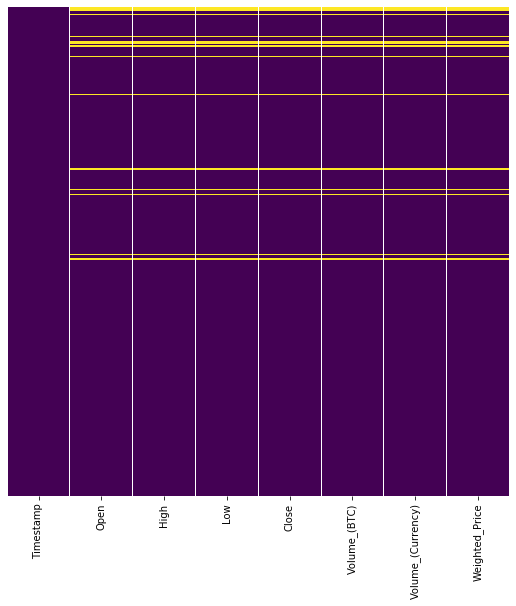

In [115]:
#FIND OUT WHERE THE MISSING VALUES IS:
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

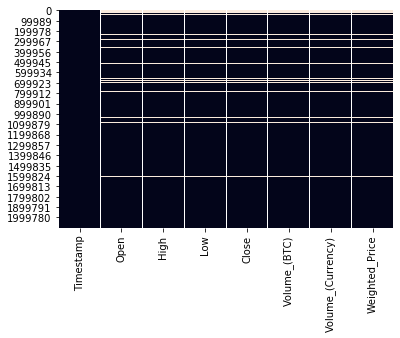

In [116]:
sns.heatmap(df.isnull(),cbar= False)

In [117]:
#I SEE THAT :
             #ALL THE COLOUMN EXCEPT TIMESTAMP HAS MISSING VALUES AS SHOWN ABOVE AND VALUES ARE SOMEWHAT EQUAL.

# DATA VISUALIZATION AND PREPROCESSING:-

In [118]:
d =df['Low'].value_counts(dropna='False') #USED A SERIES CONTAINING COUNTS OF UNIQUE VALUES
                          #EXCLUDES NA VALUES BY DEFAULT.
d

6399.99     446
238.00      373
6400.00     336
237.00      327
237.50      301
           ... 
8040.07       1
14502.75      1
8087.18       1
3838.36       1
6287.66       1
Name: Low, Length: 432869, dtype: int64

# VISUAL EXPLORATORY DATA ANALYSIS:-

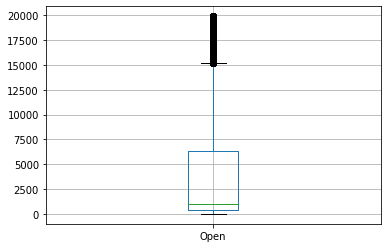

In [119]:
df.boxplot(column='Open')
plt.show()

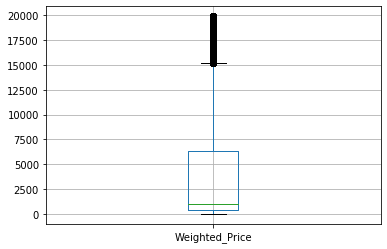

In [120]:
df.boxplot(column='Weighted_Price')

Text(0.5, 1.0, 'Close')

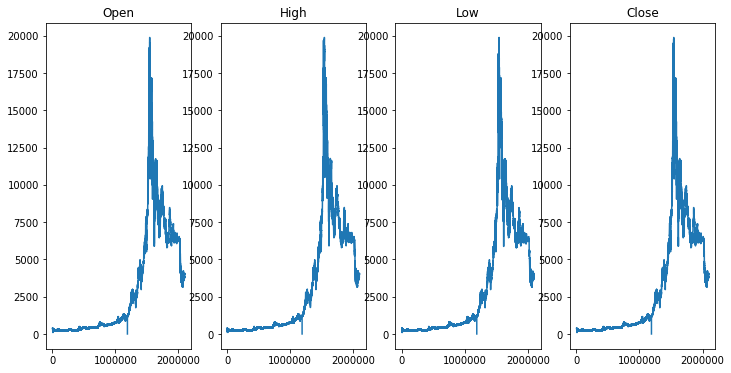

In [121]:
#columns with missing values
fig,axes = plt.subplots(1,4,figsize=(12,6))
axes[0].plot(df['Open'])
axes[0].set_title("Open")
axes[1].plot(df['High'])
axes[1].set_title("High")
axes[2].plot(df['Low'])
axes[2].set_title("Low")
axes[3].plot(df['Close'])
axes[3].set_title("Close")

Text(0.5, 1.0, 'Weighted_Price')

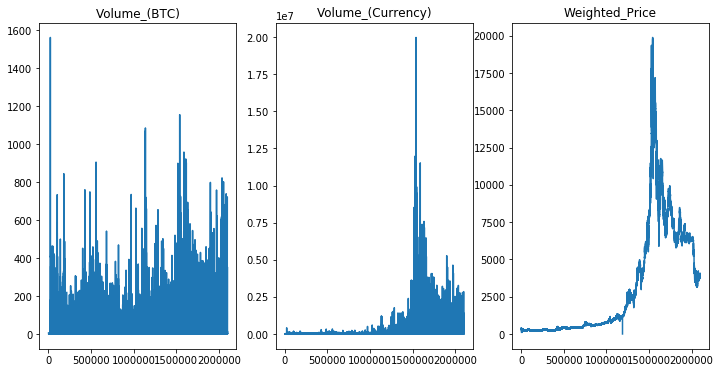

In [122]:
fig,axes = plt.subplots(1,3,figsize=(12,6))
axes[0].plot(df['Volume_(BTC)'])
axes[0].set_title("Volume_(BTC)")
axes[1].plot(df['Volume_(Currency)'])
axes[1].set_title("Volume_(Currency)")
axes[2].plot(df['Weighted_Price'])
axes[2].set_title("Weighted_Price")

In [123]:
df_nonan= df.dropna(thresh=2)#DROPNA()FUCTION USED TO REMOVE MISSING VALUES.
                             #THRESH -REQUIRE THAT MANY NON NA VALUES.

In [124]:
df_nonan.head(15)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.0,300.00,300.0,0.010000,3.000000,300.000000
7,1417412400,300.00,300.0,300.00,300.0,0.010000,3.000000,300.000000
51,1417415040,370.00,370.0,370.00,370.0,0.010000,3.700000,370.000000
77,1417416600,370.00,370.0,370.00,370.0,0.026556,9.825550,370.000000
1436,1417498140,377.00,377.0,377.00,377.0,0.010000,3.770000,377.000000
1766,1417517940,377.75,378.0,377.75,378.0,4.000000,1511.937500,377.984375
1771,1417518240,378.00,378.0,378.00,378.0,4.900000,1852.200000,378.000000
1772,1417518300,378.00,378.0,378.00,378.0,5.200000,1965.600000,378.000000
2230,1417545780,378.00,378.0,378.00,378.0,0.100000,37.800000,378.000000
2245,1417546680,378.00,378.0,378.00,378.0,0.793600,299.980800,378.000000


# DATA PREPROCESSING:-

In [125]:
#THERE ARE 2 POSSIBLE APPROACHES FOR MISSING DATA IN OUR DATASET:-
#1:WHEN AT A GIVEN TIMESTAMP THERE IS NO TRADE ,THE FIELD WILL BE FILLED WITH NAN VALUE.
#2:WHEN SUPPOSE API IS DOWN (TECHNICAL ERROR),THEN TIMESTAMP IS MISSING

# SELECTING DATA:-

In [126]:
#SELECT DATASET WITH MINIMAL MISSING TIMESTAMP JUMP

In [127]:
df_nonan['Delta_Timestamp']=df_nonan['Timestamp']-df_nonan['Timestamp'].shift(1) #SHIFT()IS TO SHIFT THE INDEX BY 1 PERIODS IN POSITIVE DIRECTION

C:\Users\shivangi pandey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_nonan['Delta_Timestamp']

0              NaN
7            420.0
51          2640.0
77          1560.0
1436       81540.0
            ...   
2099755       60.0
2099756       60.0
2099757       60.0
2099758       60.0
2099759       60.0
Name: Delta_Timestamp, Length: 1990691, dtype: float64

In [129]:
df_nonan['Delta_Timestamp'].tail(5000)# TAIL()USED TO PRINTS THE LAST FEW NUMBER OF LINES

2094760    60.0
2094761    60.0
2094762    60.0
2094763    60.0
2094764    60.0
           ... 
2099755    60.0
2099756    60.0
2099757    60.0
2099758    60.0
2099759    60.0
Name: Delta_Timestamp, Length: 5000, dtype: float64

In [130]:
df= df.tail(5000)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2094760,1546598820,3787.18,3790.00,3787.18,3790.00,24.543028,92964.721480,3787.826074
2094761,1546598880,3789.99,3790.00,3789.99,3790.00,1.289922,4888.792355,3789.991471
2094762,1546598940,3790.00,3790.21,3790.00,3790.21,0.457465,1733.802035,3790.023822
2094763,1546599000,3791.53,3793.67,3791.53,3792.00,3.529184,13383.168307,3792.142707
2094764,1546599060,3792.01,3792.01,3792.01,3792.01,0.478178,1813.254923,3792.010000


# PLOTTING

## CORRELATION MAP:-

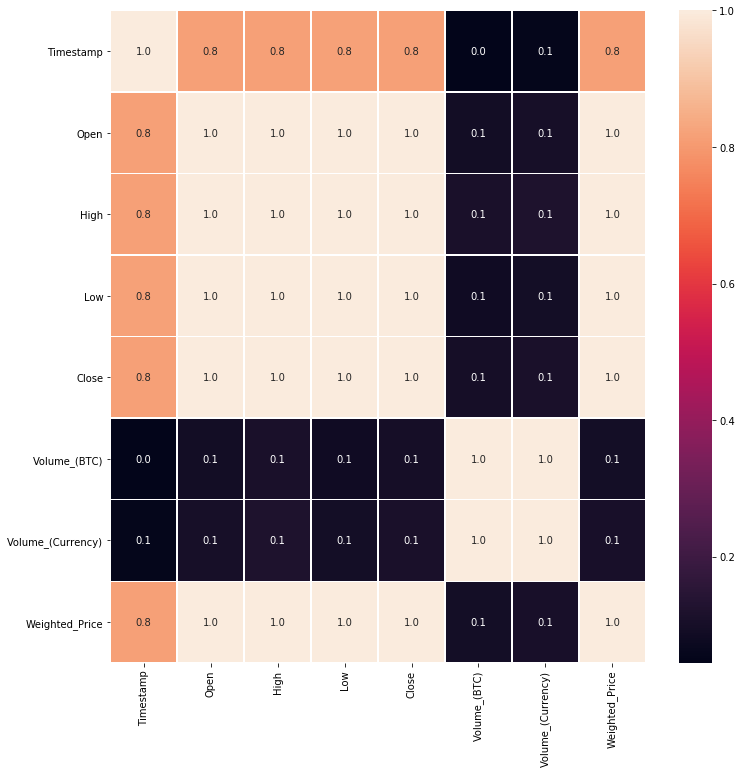

In [131]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt='.1f', linewidths=0.5, linecolor='white', ax=ax)
plt.show()

## LINE PLOT

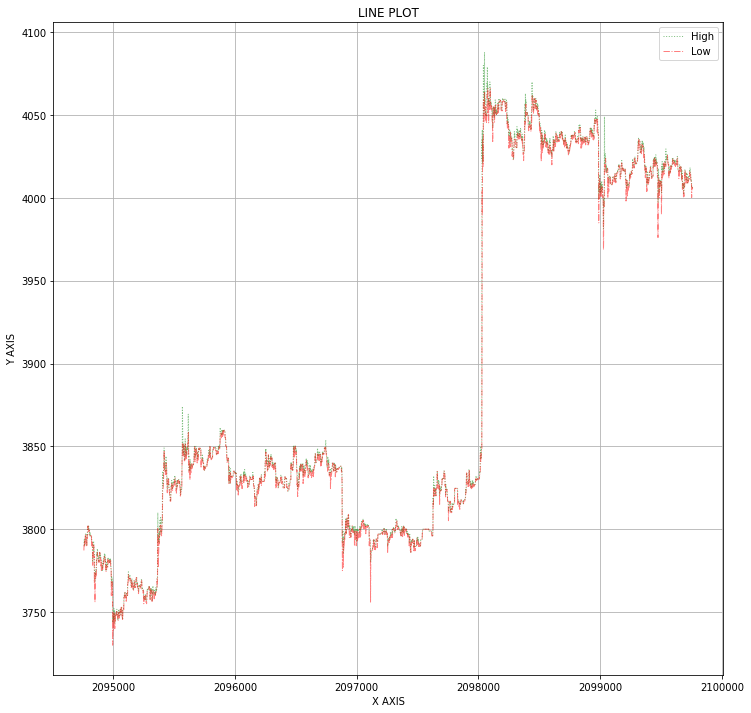

In [132]:
df.High.plot(kind = 'line',color = 'g',label='High',linewidth=1,alpha=0.5,grid = True,linestyle=':',figsize=(12,12))
df.Low.plot(color = 'r',label='Low',linewidth=1,alpha=0.5,grid = True,linestyle='-.',figsize=(12,12))
plt.legend()
plt.xlabel('X AXIS')
plt.ylabel('Y AXIS')
plt.title('LINE PLOT')
plt.show()

## HISTOGRAM 

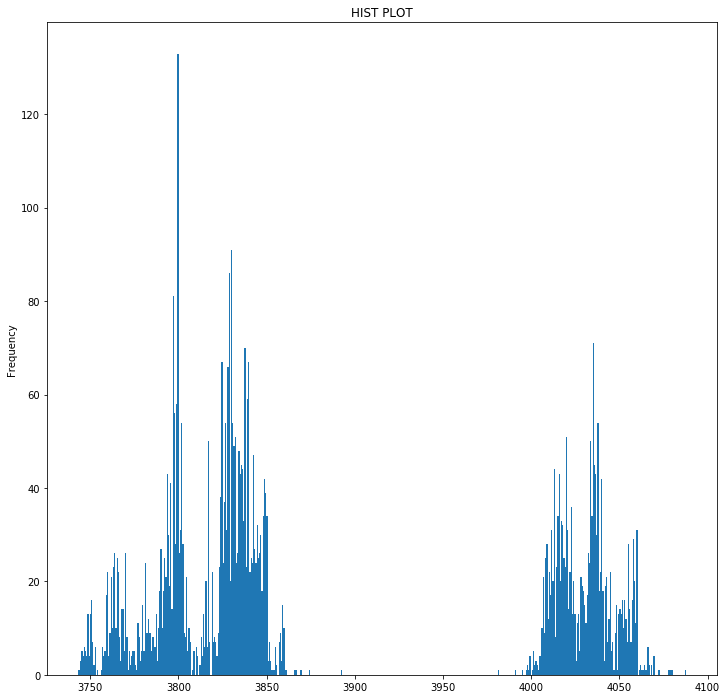

In [133]:
df.High.plot(kind ='hist',bins=500,figsize=(12,12))
plt.title('HIST PLOT')
plt.show()

## SCATTER PLOT

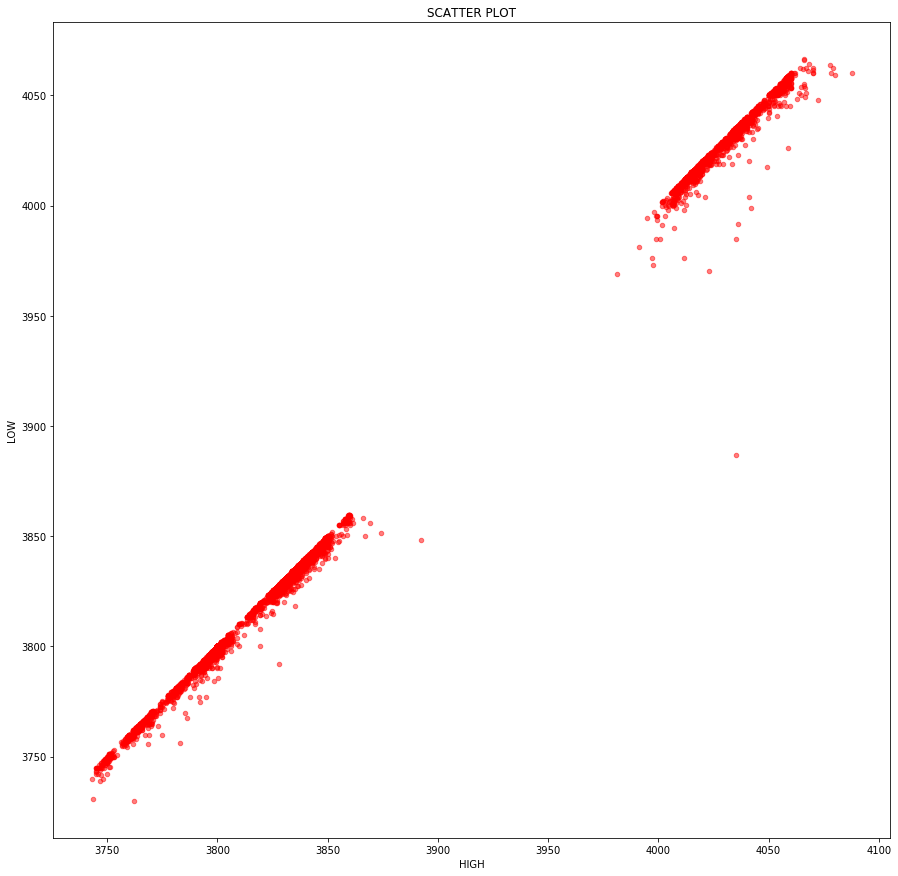

In [134]:
#1:-
df.plot(kind = 'scatter',color = 'r',x='High',y='Low',alpha=0.5,figsize=(15,15))
plt.xlabel('HIGH')
plt.ylabel('LOW')
plt.title('SCATTER PLOT')
plt.show()

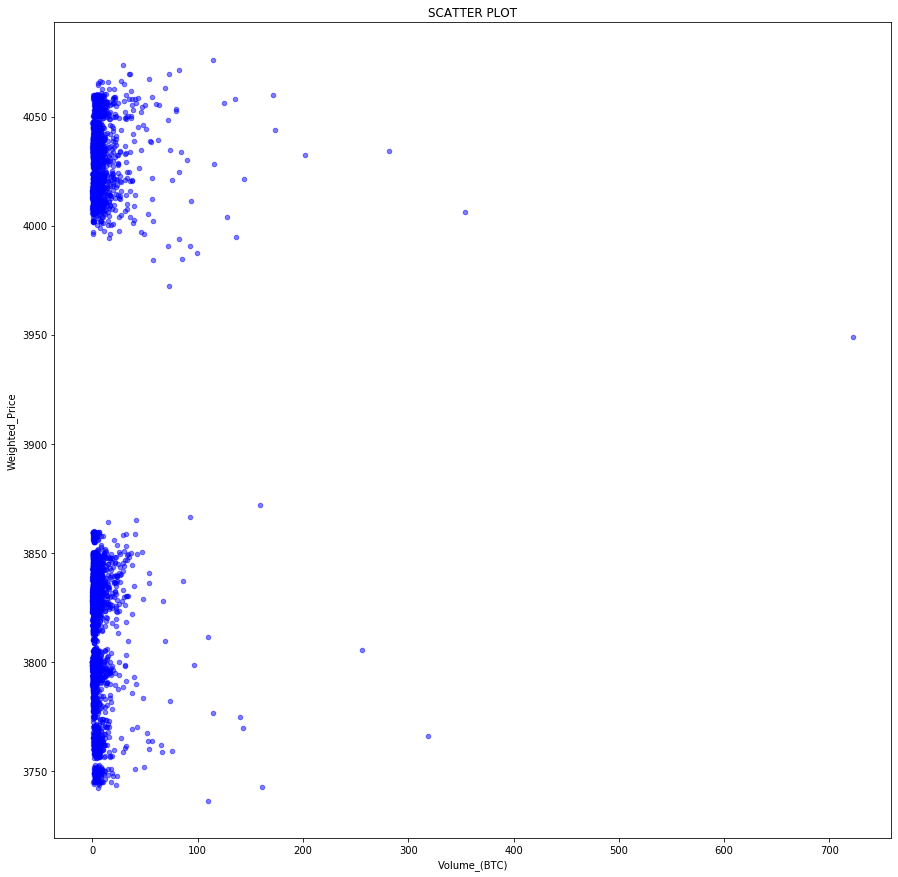

In [135]:
#2:-
df.plot(kind = 'scatter',color = 'blue',x='Volume_(BTC)',y='Weighted_Price',alpha=0.5,figsize=(15,15))
plt.xlabel('Volume_(BTC)')
plt.ylabel('Weighted_Price')
plt.title('SCATTER PLOT')
plt.show()

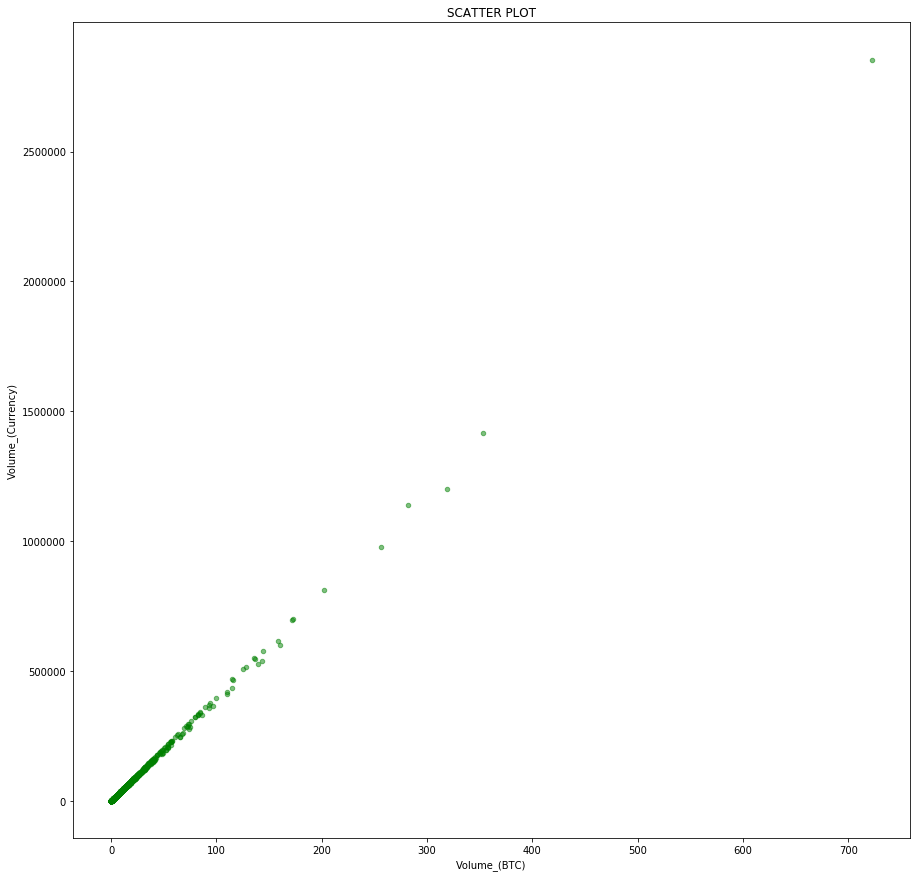

In [136]:
#3:-
df.plot(kind = 'scatter',color = 'g',x='Volume_(BTC)',y='Volume_(Currency)',alpha=0.5,figsize=(15,15))
plt.xlabel('Volume_(BTC)')
plt.ylabel('Volume_(Currency)')
plt.title('SCATTER PLOT')
plt.show()

# MISSING VALUES REPLACEMENT

In [137]:
#REPLACE NAN FIELD WITH PREVIOUS DATA FOR CONTINOUS TIME SERIES DATA

In [138]:
df['Open'].fillna(method='ffill',inplace=True)           # FILLNA () IS USED TO FILL NA/NAN VALUES
df['High'].fillna(method='ffill',inplace=True)           # "FFILL" STANDS FOR FORWARD FILL
df['Low'].fillna(method='ffill',inplace=True)            
df['Close'].fillna(method='ffill',inplace=True)

C:\Users\shivangi pandey\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [139]:
df.columns # TELL ALL THE COLUMNS LABELS OF THE DATASET

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [140]:
#REPLACE NAN FIELD WITH ZEROS FOR SINGLE EVENT DATA

In [141]:
df['Volume_(BTC)'].fillna(value=0,inplace=True)
df['Volume_(Currency)'].fillna(value=0,inplace=True)
df['Weighted_Price'].fillna(value=0,inplace=True)

In [142]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2094760,1546598820,3787.18,3790.00,3787.18,3790.00,24.543028,92964.721480,3787.826074
2094761,1546598880,3789.99,3790.00,3789.99,3790.00,1.289922,4888.792355,3789.991471
2094762,1546598940,3790.00,3790.21,3790.00,3790.21,0.457465,1733.802035,3790.023822
2094763,1546599000,3791.53,3793.67,3791.53,3792.00,3.529184,13383.168307,3792.142707
2094764,1546599060,3792.01,3792.01,3792.01,3792.01,0.478178,1813.254923,3792.010000


In [143]:
copy_of_df = df.copy() # COPY() USED TO CREATE A COPY OF A PANDAS OBJECT.
df.drop('Timestamp',axis=1,inplace=True)
df

C:\Users\shivangi pandey\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2094760,3787.18,3790.00,3787.18,3790.00,24.543028,92964.721480,3787.826074
2094761,3789.99,3790.00,3789.99,3790.00,1.289922,4888.792355,3789.991471
2094762,3790.00,3790.21,3790.00,3790.21,0.457465,1733.802035,3790.023822
2094763,3791.53,3793.67,3791.53,3792.00,3.529184,13383.168307,3792.142707
2094764,3792.01,3792.01,3792.01,3792.01,0.478178,1813.254923,3792.010000
...,...,...,...,...,...,...,...
2099755,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


# TESTING LINEAR REGRESSION

## STATISTICAL FUNCTIONS:-

In [144]:
from scipy import stats 

In [145]:
def rem_outlier(df1,col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    r = q3-q1
    low=q1 -1.5* r
    high = q3+1.5*r
    out = df1.loc[(df1[col]> low)& (df1[col]<high)]
    return out

In [146]:
for feature in list(df):
    df = rem_outlier(df,feature)
df=df[(np.abs(stats.zscore(df))< 2.999999).all(axis=1)]
df=df[(np.abs(stats.zscore(df))>- 2.999999).all(axis=1)]
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2094761,3789.99,3790.00,3789.99,3790.00,1.289922,4888.792355,3789.991471
2094762,3790.00,3790.21,3790.00,3790.21,0.457465,1733.802035,3790.023822
2094763,3791.53,3793.67,3791.53,3792.00,3.529184,13383.168307,3792.142707
2094764,3792.01,3792.01,3792.01,3792.01,0.478178,1813.254923,3792.010000
2094765,3792.01,3792.01,3789.99,3790.00,0.888946,3369.682460,3790.648621
...,...,...,...,...,...,...,...
2099755,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


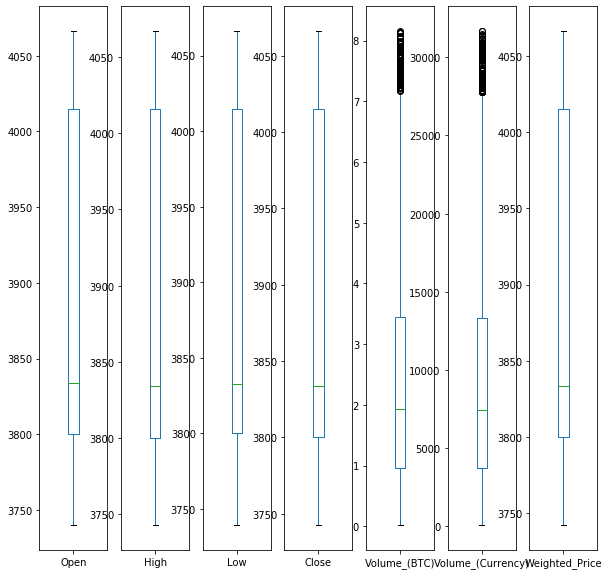

In [147]:
%matplotlib inline
df.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(10,10))# HERE ,SHAREX AND SHAREY = FALSE OR NONE MENAS EACH SUBPLOT X AXIS AND Y AXIS WILL BE INDEPENDENT.
plt.show()

# VISUALIZE THE CORRELATION MATRIX

In [148]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('PuOr'),axis=1)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.0,1.0,1.0,1.0,0.12,0.16,1.0
High,1.0,1.0,1.0,1.0,0.12,0.16,1.0
Low,1.0,1.0,1.0,1.0,0.12,0.15,1.0
Close,1.0,1.0,1.0,1.0,0.12,0.16,1.0
Volume_(BTC),0.12,0.12,0.12,0.12,1.0,1.0,0.12
Volume_(Currency),0.16,0.16,0.15,0.16,1.0,1.0,0.16
Weighted_Price,1.0,1.0,1.0,1.0,0.12,0.16,1.0


# FEATURE SCALING OR STANDARDIZATION

In [149]:
from sklearn.preprocessing import StandardScaler # STANDARD SCALER IS USED TO TRANSFORMS THE DATA IN SUCH A WAY THAT IT HAS MEAN AS '0',AMD STD AS '1'.

In [150]:
scaler = StandardScaler()

In [151]:
X=df[[feature for feature in list(df) if feature!= 'Weighted_Price']]

In [152]:
df[[feature for feature in list(df) if feature!= 'Weighted_Price']]=scaler.fit_transform(df[[feature for feature in list(df)if feature!='Weighted_Price']])
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2094761,-0.882608,-0.887348,-0.876715,-0.882787,-0.603601,-0.618270,3789.991471
2094762,-0.882511,-0.885308,-0.876618,-0.880746,-1.047473,-1.048594,3790.023822
2094763,-0.867642,-0.851691,-0.861747,-0.863349,0.590390,0.540318,3792.142707
2094764,-0.862978,-0.867819,-0.857081,-0.863252,-1.036429,-1.037757,3792.010000
2094765,-0.862978,-0.867819,-0.876715,-0.882787,-0.817404,-0.825469,3790.648621
...,...,...,...,...,...,...,...
2099755,1.216684,1.216779,1.222863,1.216646,0.512419,0.563541,4006.390309
2099756,1.216684,1.216779,1.222863,1.216646,-0.810356,-0.792134,4006.017233
2099757,1.216684,1.211338,1.222863,1.216646,-0.655748,-0.633702,4006.003635
2099758,1.216684,1.211338,1.218003,1.211690,0.148103,0.189930,4005.719991


In [153]:
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

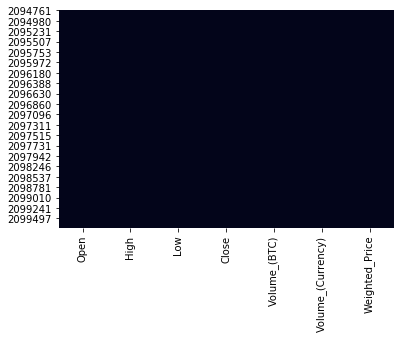

In [154]:
sns.heatmap(df.isnull(),cbar=False)

In [155]:
#Now,no null values are present 

# SPLITTING OF DATA 

In [156]:
#from sklearn.model_selection import train_test_split

In [157]:
#OTHER APPROACH:

In [158]:
msk= np.random.rand(len(df))<0.7 #RANDOM VALUES IN A GIVEN SHAPE
df_train=df[msk]
df_test= df[~msk]
y_train =df_train['Weighted_Price']
x_train =df_train[[feature for feature in list(df) if feature!='Weighted_Price']]

In [159]:
y_test =df['Weighted_Price']
x_test =df[[feature for feature in list(df) if feature!='Weighted_Price']]

# CHECKING ACCURACY

In [160]:
from sklearn import metrics,decomposition # METRICS MODULE IMPLEMENTS SEVERAL LOSS, SCORE AND UTILITY FUNCTIONS

# PRINCIPAL COMPONENT ANALYSIS(PCA)

In [161]:
pca= decomposition.PCA(n_components=6)    
x_train=pca.fit_transform(x_train)        #FIT()USED FOR GENERATING LEARNING MODEL PARAMETERS FROM TRAINING DATA,
                                          #TRANSFORM()GENERATED FROM FIT() METHOD,APPLIED UPON MODEL TO GENERATE TRANSFORMED DATA SET
                                          #COMBINATION OF FIT()AND TRANSFORM()API ON SAME DATA SET
print(x_train.shape)

(2956, 6)


In [162]:
x_test=pca.transform(x_test)
print(x_test.shape)

(4182, 6)


# LINEAR REGRESSION

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
import time # RETURNS THE NO OF SEC PASSED SINCE EPOCH.

In [165]:
lr=LinearRegression()
start=time.time()

In [166]:
lr.fit(x_train,y_train)
end=time.time()
print(end-start)
print('TRAIN SCORE IS :-{}'.format(lr.score(x_train,y_train)))
print('TEST SCORE IS :-{}'.format(lr.score(x_test,y_test)))

0.02771592140197754
TRAIN SCORE IS :-0.9999855005344377
TEST SCORE IS :-0.9999857292110031


In [167]:
predict=lr.predict(x_test)
print("ACCURACY IS :-",lr.score(x_test,y_test))

ACCURACY IS :- 0.9999857292110031


# PLOT BETWEEN ACTUAL AND PREDICTED VALUES

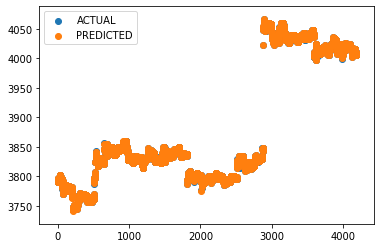

In [168]:
y_len=range(len(y_test))
y_act=y_test
plt.scatter(y_len,y_act)
plt.scatter(y_len,predict)
plt.gca()
plt.legend(('ACTUAL','PREDICTED'))
plt.show()


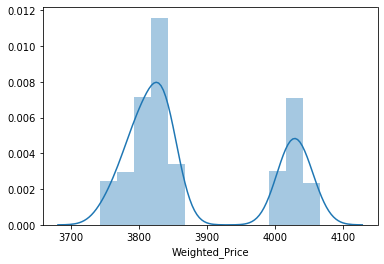

In [169]:
sns.distplot(df["Weighted_Price"])

In [171]:
from sklearn.model_selection import GridSearchCV#USED FOR FIND OPTIMAL HYPERPARAMETERS OF A MODEL WHICH 
                                                #RESULTS IN THE MOST ACCURATE PREDICTIONS

In [172]:
normalize = [False,True]
n_jobs=[0,1,5,10]
fit_intercept=[False,True]
copy_X = [False,True]

In [173]:
param_grid= dict(normalize = normalize,
n_jobs=n_jobs,
fit_intercept= fit_intercept,
copy_X = copy_X)

In [174]:
grid= GridSearchCV(estimator=lr, param_grid =param_grid,cv=5)
grid_result=grid.fit(x_train,y_train)
grid_result.best_params_

{'copy_X': False, 'fit_intercept': True, 'n_jobs': 0, 'normalize': False}

In [175]:
lr=LinearRegression(copy_X= False, fit_intercept= True, n_jobs= 0, normalize= False)
start=time.time()
lr.fit(x_train,y_train)
end=time.time()
print(end-start)
predict = lr.predict(x_test)
print(lr.score(x_test,y_test))

0.0058269500732421875
0.9999857292110031


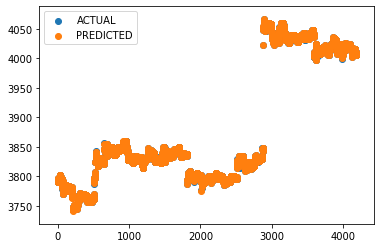

In [176]:
y_len=range(len(y_test))
y_act=y_test
plt.scatter(y_len,y_act)
plt.scatter(y_len,predict)
plt.gca()
plt.legend(('ACTUAL','PREDICTED'))
plt.show()